In [62]:
# !pip install fastai==2

In [12]:
from fastai.vision import *
import pandas as pd

In [13]:
udt_csv = pd.read_csv("https://raw.githubusercontent.com/UniversalDataTool/udt-dataset-cats-and-dogs/master/coco_dogs_and_cats.udt.csv")

In [14]:
udt_csv

,path,.,custom_id,annotation,imageUrl
0,interface,"{""type"":""image_classification"",""labels"":[""cat""...",NaN,NaN,NaN
1,samples.0,NaN,202548.0,cat,https://farm3.staticflickr.com/2172/2223211937...
2,samples.1,NaN,175202.0,cat,https://farm5.staticflickr.com/4084/5171697142...
3,samples.2,NaN,164910.0,dog,https://farm5.staticflickr.com/4129/4981342076...
4,samples.3,NaN,40348.0,cat,https://farm6.staticflickr.com/5175/5397720612...
...,...,...,...,...,...
4580,samples.4579,NaN,510320.0,cat,https://farm4.staticflickr.com/3404/3251914121...
4581,samples.4580,NaN,181776.0,cat,https://farm7.staticflickr.com/6158/6171804215...
4582,samples.4581,NaN,115763.0,dog,https://farm1.staticflickr.com/71/227154632_11...
4583,samples.4582,NaN,534347.0,cat,https://farm4.staticflickr.com/3627/3463763857...


In [15]:
udt_samples = udt_csv[udt_csv["path"].str.contains("samples.")]

In [16]:
udt_samples

,path,.,custom_id,annotation,imageUrl
1,samples.0,NaN,202548.0,cat,https://farm3.staticflickr.com/2172/2223211937...
2,samples.1,NaN,175202.0,cat,https://farm5.staticflickr.com/4084/5171697142...
3,samples.2,NaN,164910.0,dog,https://farm5.staticflickr.com/4129/4981342076...
4,samples.3,NaN,40348.0,cat,https://farm6.staticflickr.com/5175/5397720612...
5,samples.4,NaN,3729.0,cat,https://farm4.staticflickr.com/3243/2533135320...
...,...,...,...,...,...
4580,samples.4579,NaN,510320.0,cat,https://farm4.staticflickr.com/3404/3251914121...
4581,samples.4580,NaN,181776.0,cat,https://farm7.staticflickr.com/6158/6171804215...
4582,samples.4581,NaN,115763.0,dog,https://farm1.staticflickr.com/71/227154632_11...
4583,samples.4582,NaN,534347.0,cat,https://farm4.staticflickr.com/3627/3463763857...


In [ ]:
dog_samples = udt_samples[udt_samples["annotation"] == "dog"]
cat_samples = udt_samples[udt_samples["annotation"] == "cat"]

In [37]:
dog_samples.to_csv("dog_urls.csv", columns=["imageUrl"], header=False, index=False)
cat_samples.to_csv("cat_urls.csv", columns=["imageUrl"], header=False, index=False)

In [38]:
pd.read_csv("dog_urls.csv")

,https://farm5.staticflickr.com/4129/4981342076_01e05dd322_z.jpg
0,https://farm3.staticflickr.com/2126/2462953678...
1,https://farm9.staticflickr.com/8104/8529013737...
2,https://farm5.staticflickr.com/4149/4992412402...
3,https://farm7.staticflickr.com/6172/6199640728...
4,https://farm4.staticflickr.com/3644/3943129807...
...,...
2330,https://farm4.staticflickr.com/3134/2336167325...
2331,https://farm6.staticflickr.com/5138/5560902335...
2332,https://farm4.staticflickr.com/3358/3604821366...
2333,https://farm1.staticflickr.com/71/227154632_11...


In [49]:
download_images("dog_urls.csv", "images/dog" , max_pics=500)
download_images("cat_urls.csv", "images/cat" , max_pics=500)

In [50]:
verify_images("images/dog", delete=True, max_size=500)
verify_images("images/cat", delete=True, max_size=500)

In [51]:
data = ImageDataBunch.from_folder("images", train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

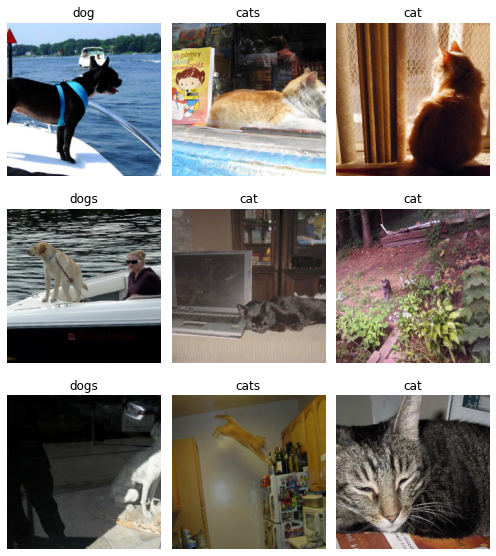

In [52]:
data.show_batch(rows=3, figsize=(7,8))

In [57]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.092580,1.628162,0.657500,03:41
1,1.831077,1.631048,0.702500,03:31
2,1.580452,1.510488,0.775000,03:39
3,1.361593,1.478936,0.795000,04:11
